# Multiple Linear Regression
## Bike Sharing Case Study

<h2>Problem Statement</h2>
<p>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.</p>
<p><br>
  A US bike-sharing provider <strong>BoomBikes</strong> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. </p>
<p><br>
  In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.</p>
<p><br>
  They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:</p>
<ul>
  <li>Which variables are significant in predicting the demand for shared bikes.</li>
  <li>How well those variables describe the bike demands</li>
</ul>
<p>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. </p>
<p><br>
  <strong>Business Goal:</strong><br>
  You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. </p>

## Step 1: Reading and Understanding the Data

In [1]:
# import numpy, pandas, suppress warnings
import numpy as np, pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read csv
bike = pd.read_csv("day.csv")

In [4]:
# see first 5 rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#check shape
bike.shape

(730, 16)

In [7]:
#check for null values and data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Inference: No missing values

In [8]:
#numerical data details
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Exploratory Data Analysis

## Steps 2 & 3: Data Preparation & Visualization

1. Dropping unnecessary columns
- instant: is index
- dteday: is date, however yr, mth are provided
- casual: total of casual and registered is target variable (cnt)
- registered: total of casual and registered is target variable (cnt)

In [28]:
#making a copy before making changes
bike1 = bike.copy()

In [29]:
#dropping columns
bike1.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

2. Changing numerical values of categorical variables to interpretable values

In [68]:
bike1.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike1.weathersit.replace({1:'clear',2:'misty',3:'light_prec',4:'heavy_prec'},inplace = True)

bike1.mnth = bike1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',
                                          4: 'apr',5: 'may',6: 'jun', 
                                          7: 'jul',8: 'aug',9: 'sept',
                                          10: 'oct',11: 'nov',12: 'dec'})
bike1.weekday = bike1.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [69]:
# import plotting libraries
import matplotlib.pyplot as plt, seaborn as sns

plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')   #darkgrid, whitegrid, dark, white, ticks

### Visualising Numeric Variables

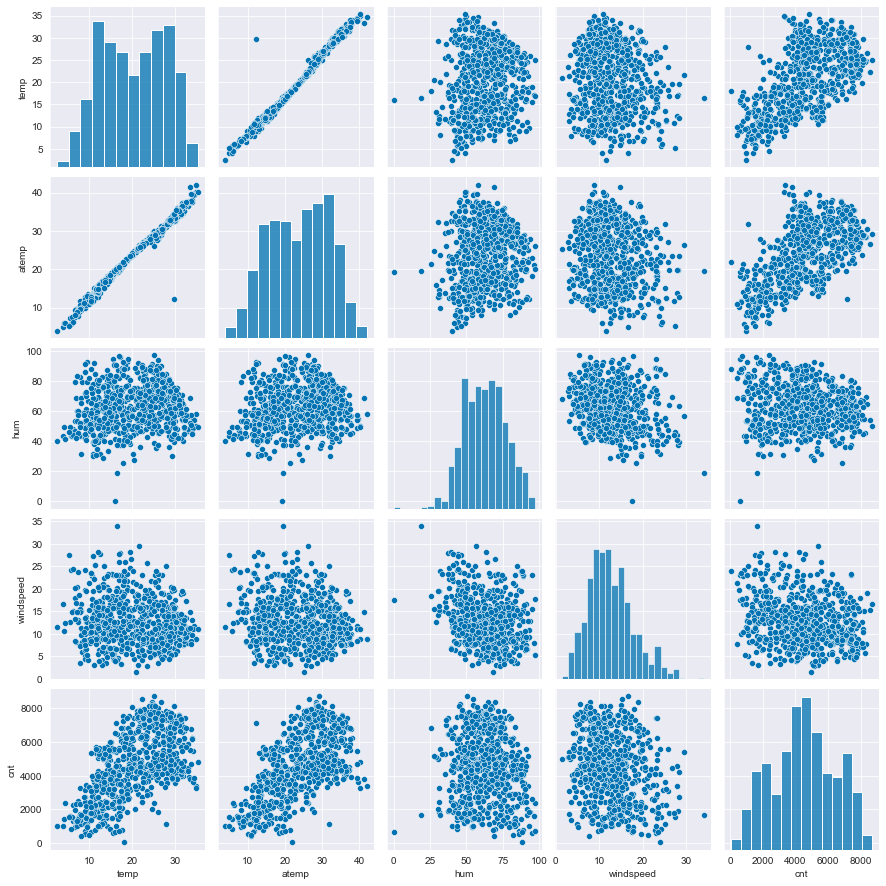

In [70]:
sns.pairplot(data=bike1,vars=['temp', 'atemp', 'hum','windspeed', 'cnt'])
plt.show()

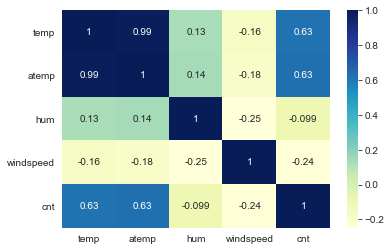

In [71]:
# correlation heat map
sns.heatmap(bike1[['temp', 'atemp', 'hum','windspeed', 'cnt']].corr(), cmap="YlGnBu", annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

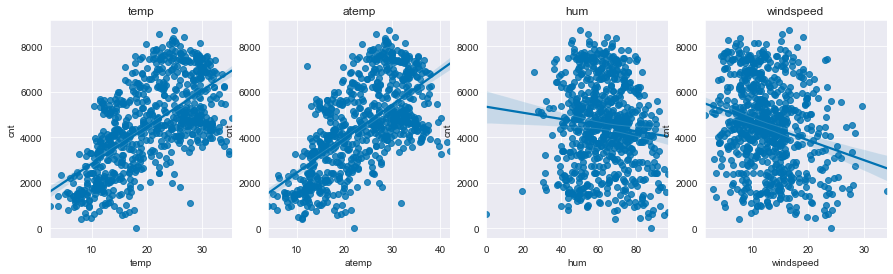

In [72]:
plt.figure(figsize=[15,4])

plt.subplot(1, 4, 1)
sns.regplot(x='temp', y='cnt', data=bike1)
plt.title('temp', fontsize=12)

plt.subplot(1, 4, 2)
sns.regplot(x='atemp', y='cnt', data=bike1)
plt.title('atemp', fontsize=12)

plt.subplot(1, 4, 3)
sns.regplot(x='hum', y='cnt', data=bike1)
plt.title('hum', fontsize=12)

plt.subplot(1, 4, 4)
sns.regplot(x='windspeed', y='cnt', data=bike1)
plt.title('windspeed', fontsize=12)

plt.show

#### Inference:
- temp, atemp have a high positive colinearity with cnt
- high colinearlity between temp & atemp

### Visualising Categorical Variables vs Target Variable

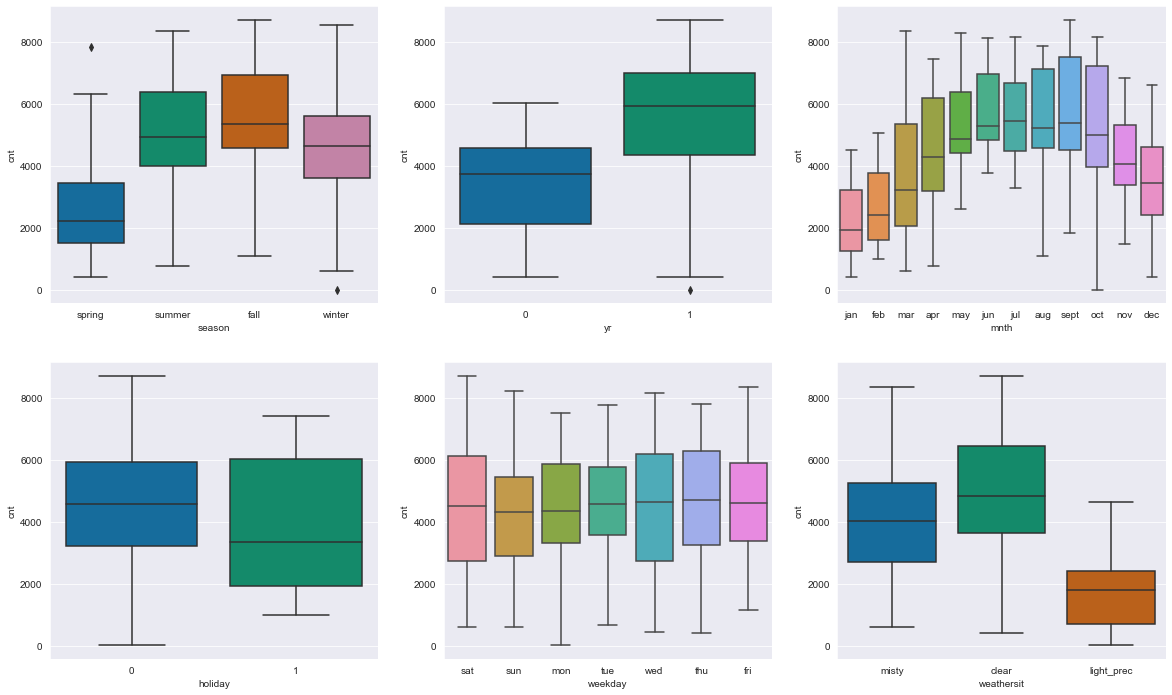

In [73]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike1)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike1)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike1)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike1)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike1)
plt.show()

#### Inference: 
- no outliers
- Season 1 has a very low demand compared to others, season 3 being highest
- Higher demand in 2019
- continuous trend with month
- demand decrease on holidays
- not significant changes with weekdays


# Model Building

## Data Preparation for Model 

In [188]:
#making copy before changes
bike2 = bike1.copy()

### Dummy Variables

In [189]:
bike2 = pd.get_dummies(data=bike2,columns=["season","mnth","weekday"],drop_first=True)
bike2 = pd.get_dummies(data=bike2,columns=["weathersit"],drop_first=True)
bike2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_prec,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [190]:
bike2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_prec', 'weathersit_misty'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

In [191]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)   # np.random.seed(0) makes the random numbers predictable. 
                    # With the seed reset (every time), the same set of numbers will appear every time.
                    # If the random seed is not reset, different numbers appear with every invocation.
        
df_train, df_test = train_test_split(bike2, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling features

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Instantiate normalizer object

In [193]:
# Apply scaler() to continuous numeric data
num_vars = ['temp','atemp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # 2. Fit on data

In [194]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_prec,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [195]:
y_train = df_train.pop('cnt')
X_train = df_train

In [196]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [197]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_prec,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Step 5: Building Linear Model

### RFE

In [198]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [199]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [200]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 5),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 15),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 10),
 ('weathersit_light_prec', True, 1),
 ('weathersit_misty', True, 1)]

In [201]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_light_prec',
       'weathersit_misty'],
      dtype='object')

In [202]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [203]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [204]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [205]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [206]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.31e-191
Time:                        22:48:08   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2204.05

In [207]:
# Dropping mnth_jan as its has the highest p-value
X_train_new = X_train_rfe.drop(["mnth_jan"], axis = 1)

Rebuilding the model without mnth_jan

In [208]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [209]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [210]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.13e-191
Time:                        22:48:12   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2102.68

#### Obs: All variables now have p-value > 0.05 

In [211]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_light_prec',
       'weathersit_misty'],
      dtype='object')

In [212]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Calculating VIFs

In [213]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.44
7,season_summer,2.83
13,weathersit_misty,2.28
0,yr,2.08
11,weekday_sat,1.97


In [214]:
# Dropping hum as its has high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

Rebuilding the model without mnth_jan

In [215]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

In [216]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [217]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.73e-189
Time:                        22:48:26   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1392.45

In [218]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_light_prec',
       'weathersit_misty'],
      dtype='object')

In [219]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Calculating VIFs

In [220]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.32
0,yr,2.07
7,season_winter,1.99
10,weekday_sat,1.96
8,mnth_jul,1.58
12,weathersit_misty,1.56


In [221]:
# Dropping temp as its has high VIF
X_train_new = X_train_new.drop(["temp"], axis = 1)

Rebuilding the model without temp

In [222]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

In [223]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [224]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.01e-149
Time:                        22:48:38   Log-Likelihood:                -4213.1
No. Observations:                 510   AIC:                             8452.
Df Residuals:                     497   BIC:                             8507.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4734.72

In [225]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_light_prec', 'weathersit_misty'],
      dtype='object')

In [226]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [227]:
# Dropping mnth_jul as its has high p-value
X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)

Rebuilding the model without mnth_jul

In [228]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

In [229]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [230]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.99e-151
Time:                        22:48:47   Log-Likelihood:                -4213.2
No. Observations:                 510   AIC:                             8450.
Df Residuals:                     498   BIC:                             8501.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4699.30

In [231]:
# Dropping holiday as its has high p-value
X_train_new = X_train_new.drop(["holiday"], axis = 1)

Rebuilding the model without holiday

In [232]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [233]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [234]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.40e-151
Time:                        22:48:53   Log-Likelihood:                -4214.9
No. Observations:                 510   AIC:                             8452.
Df Residuals:                     499   BIC:                             8498.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4630.49

In [235]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_light_prec', 'weathersit_misty'],
      dtype='object')

In [236]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Calculating VIFs

In [237]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.99
1,workingday,3.29
3,season_spring,2.00
4,season_summer,1.99
0,yr,1.88
5,season_winter,1.73
7,weekday_sat,1.56
9,weathersit_misty,1.55
6,mnth_sept,1.18
8,weathersit_light_prec,1.08


##Step 7: Residual Analysis of the train data

In [238]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

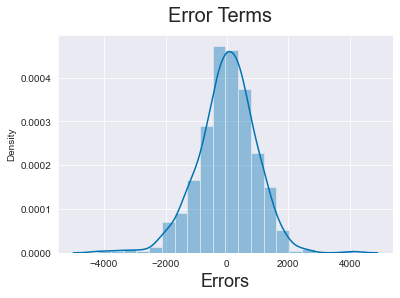

In [239]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [241]:
# Apply scaling on test data
num_vars = ['temp','atemp','hum','windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [243]:
y_test = df_test.pop('cnt')
X_test = df_test

In [244]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [250]:
# Making predictions
y_pred = lm.predict(X_test_new)
y_train_pred = lm.predict(X_train_lm)

### Model Evaluation

Text(0, 0.5, 'y_pred')

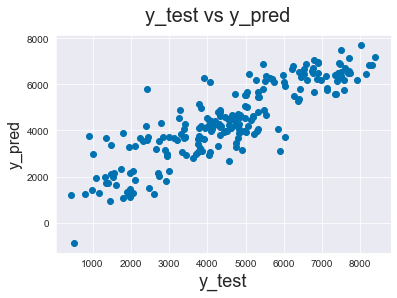

In [246]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [252]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_pred))

0.7678420101728198
0.7503732169558834


# Conclusion

# Linear Equation

cnt = 4630.4923*const + 2150.9308*yr + 491.7071*workingday - 1496.4872*windspeed - 2580.2806*season_spring - 360.9779*season_summer - 634.8625*season_winter + 627.5042*mnth_sept + 556.3684*weekday_sat - 2617.7535*weathersit_light_prec - 800.704*weathersit_misty

#### Predictor variables with Positive corelation
- yr
- workingday
- mnth_sept
- weekday_sat

#### Predictor variables with Negative corelation
- windspeed
- season_spring
- season_summer
- season_winter
- weathersit_light_prec
- weathersit_misty